In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [2]:
input_df = pd.read_csv(filepath_or_buffer=r'.\suv\User_Data.csv')
input_df.head()
X = input_df[["User ID","Gender","Age","EstimatedSalary"]]
y = input_df[['Purchased']]

In [3]:
categorical_feature_mask=X.dtypes == object
categorical_masked_cols = X.columns[categorical_feature_mask].tolist()
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer([('encoder', 
                         OneHotEncoder(categories=[['Male','Female']],drop='first'), 
                         categorical_masked_cols)], remainder='passthrough')
cat_data = np.array(ct.fit_transform(X[categorical_masked_cols]), dtype=np.int)
X = pd.DataFrame(data=cat_data,columns=['Encoded_Gender']).join(X.loc[:, X.columns != 'Gender'])

In [4]:
from sklearn.ensemble import ExtraTreesClassifier
feature_selector = ExtraTreesClassifier()
feature_selector.fit(X,y)
pd.Series(data=feature_selector.feature_importances_, index=[X.columns])

Encoded_Gender     0.014475
User ID            0.124714
Age                0.473934
EstimatedSalary    0.386877
dtype: float64

In [5]:
X = X[['Age', 'EstimatedSalary']]

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X =  pd.DataFrame(data=scaler.fit_transform(X), columns=[X.columns])

## Single Train Test Split

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

In [8]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
classifier.score(X_test, y_test)

0.89

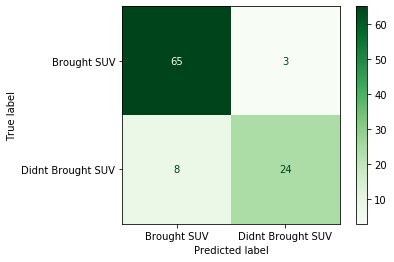

In [10]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 cmap=plt.cm.Greens,
                            display_labels = ['Brought SUV', 'Didnt Brought SUV'])

## K-Fold

In [11]:
from sklearn.model_selection import cross_val_score
classifier_cv = LogisticRegression()

In [12]:
scores = cross_val_score(estimator=classifier_cv, X=X, y=y, cv=5)
print('Score might be : {:.3f}'.format(scores.mean()))

Score might be : 0.828


In [13]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=42, shuffle=True)
scores_kf=[]

for train_index, test_index in kf.split(X):
    X_train_n, X_test_n = X.loc[train_index], X.loc[test_index]
    y_train_n, y_test_n = y.loc[train_index], y.loc[test_index]
    classifier_cv.fit(X_train_n, y_train_n)
    scores_kf.append(classifier_cv.score(X_test_n, y_test_n))

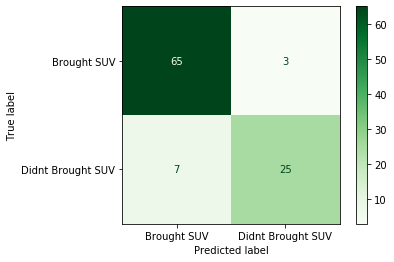

In [14]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(classifier_cv, X_test, y_test,
                                 cmap=plt.cm.Greens,
                            display_labels = ['Brought SUV', 'Didnt Brought SUV'])

## Repeated K-Fold

In [15]:
from sklearn.model_selection import RepeatedKFold

In [16]:
rkf = RepeatedKFold(n_splits=5, n_repeats=2, random_state=42)

In [17]:
classifier_rcv = LogisticRegression()
scores_rkf=[]

In [18]:
for train_index, test_index in rkf.split(X):
    X_train_n, X_test_n = X.loc[train_index], X.loc[test_index]
    y_train_n, y_test_n = y.loc[train_index], y.loc[test_index]
    classifier_rcv.fit(X_train_n, y_train_n)
    scores_rkf.append(classifier_rcv.score(X_test_n, y_test_n))

In [19]:
print('Accuracy : {:.3f}'.format(np.array(scores_rkf).mean()))
print('Standard Deviation (Varrience) : {:.3f}'.format(np.array(scores_rkf).std()))

Accuracy : 0.843
Standard Deviation (Varrience) : 0.029


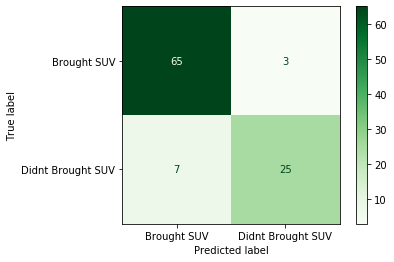

In [20]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(classifier_rcv, X_test, y_test,
                                 cmap=plt.cm.Greens,
                            display_labels = ['Brought SUV', 'Didnt Brought SUV'])